### Business Problem
#### To understand Which variables are significant in predicting the reason for hospitalization for different regions
#### How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [2]:
hospital_data=pd.read_csv("hospital_data_hospitals.csv")

In [3]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [4]:
hospital_data.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### Outlier and Null value

In [5]:
hospital_data.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospitalization charges'>

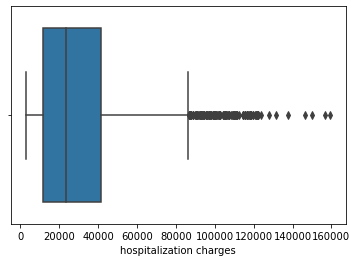

In [6]:
sns.boxplot(hospital_data["hospitalization charges"])

In [7]:
hospital_data.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [8]:
hospital_data["sex"].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [44]:
hospital_data.groupby(["sex"])["smoker"].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [9]:
hospital_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
hospital_data["severity level"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [11]:
hospital_data["smoker"].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [12]:
hospital_data["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [40]:
hospital_data["viral load"].value_counts()

9.63     13
10.77    13
11.37    12
10.17    12
8.80     10
         ..
7.93      1
10.71     1
9.70      1
14.37     1
10.32     1
Name: viral load, Length: 462, dtype: int64

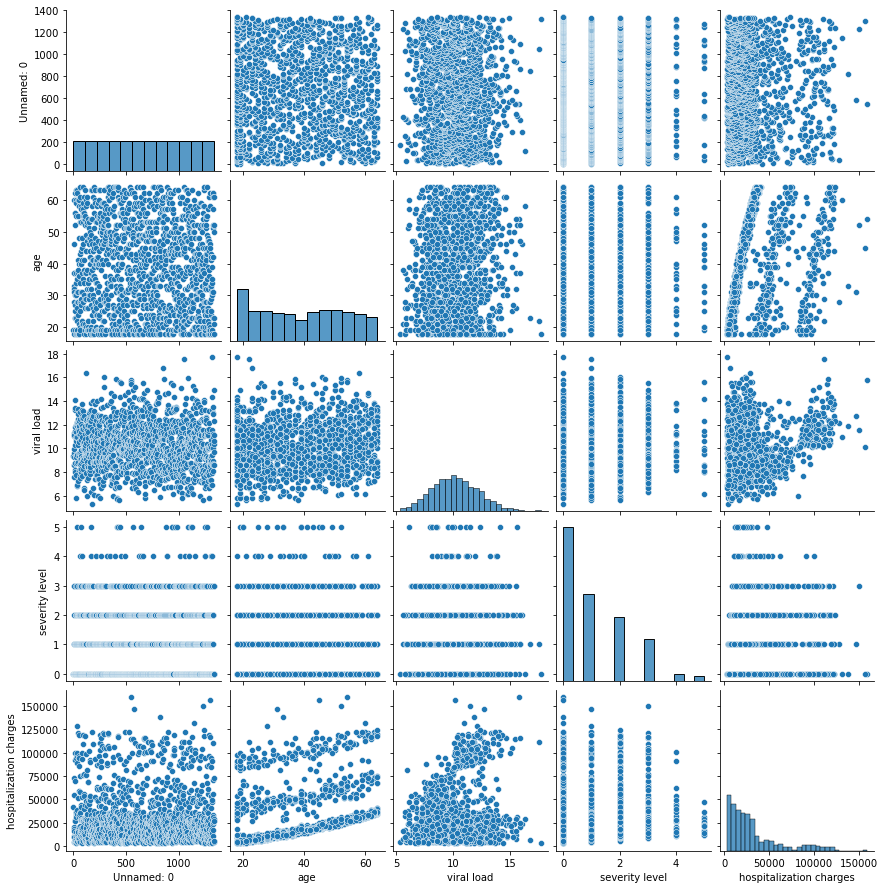

In [13]:
sns.pairplot(hospital_data)

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

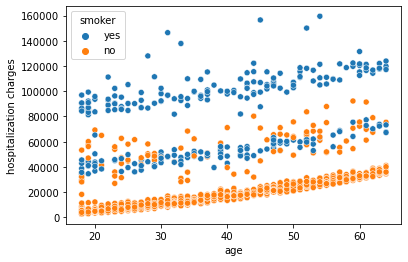

In [14]:
sns.scatterplot(data=hospital_data, x="age", y="hospitalization charges", hue="smoker")

### Observation- Based on graphical representaation it's clearly visible that with age hospitalization charge increase and hospitalization charges are higher for smoker compare to non smoker.

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

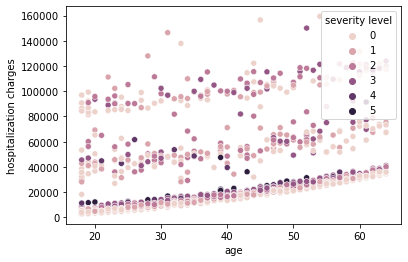

In [15]:
sns.scatterplot(data=hospital_data, x="age", y="hospitalization charges", hue="severity level")

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

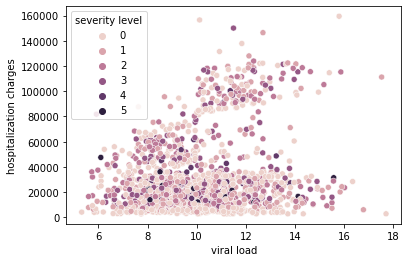

In [16]:
sns.scatterplot(data=hospital_data, x="viral load", y="hospitalization charges", hue="severity level")

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

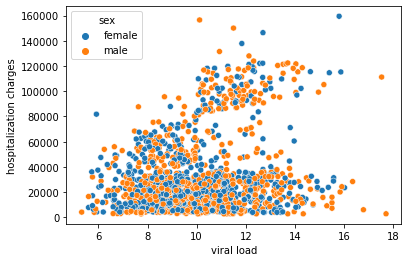

In [41]:
sns.scatterplot(data=hospital_data, x="viral load", y="hospitalization charges", hue="sex")

<AxesSubplot:xlabel='viral load', ylabel='hospitalization charges'>

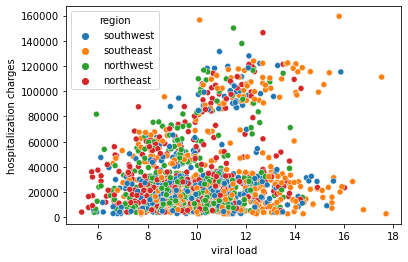

In [43]:
sns.scatterplot(data=hospital_data, x="viral load", y="hospitalization charges", hue="region")

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

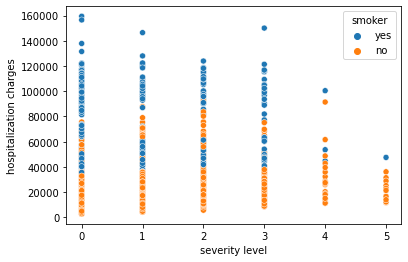

In [17]:
sns.scatterplot(data=hospital_data, x="severity level", y="hospitalization charges", hue="smoker")

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

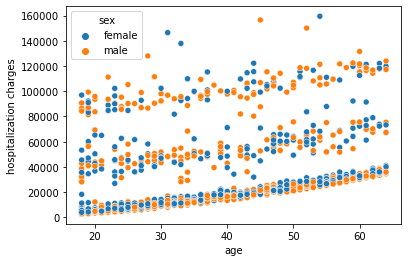

In [18]:
sns.scatterplot(data=hospital_data, x="age", y="hospitalization charges", hue="sex")

### Co-relation plot

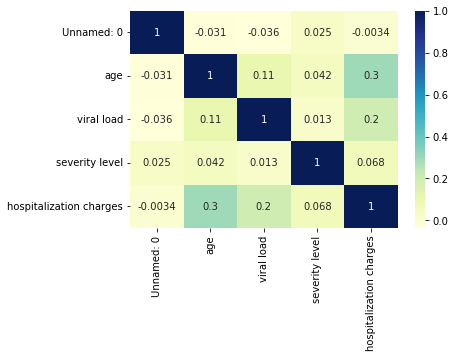

In [19]:
dataplot = sns.heatmap(hospital_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

In [20]:
smokers=hospital_data[hospital_data["smoker"]=="yes"]["hospitalization charges"]
nonsmokers=hospital_data[hospital_data["smoker"]=="no"]["hospitalization charges"]

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hospitalization charges', ylabel='Density'>

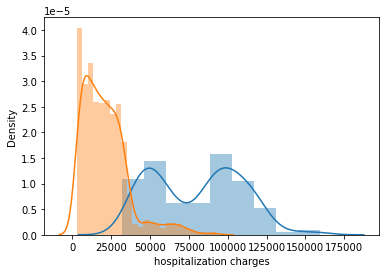

In [21]:
sns.distplot(smokers)
sns.distplot(nonsmokers)

In [22]:
sbt1,_=stats.boxcox(smokers)
sbt2,_=stats.boxcox(nonsmokers)

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

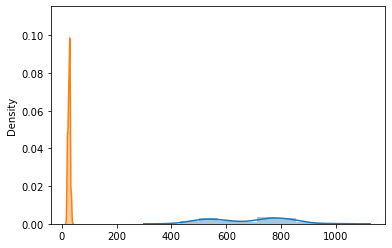

In [23]:
sns.distplot(sbt1)
sns.distplot(sbt2)

### Hypothesis - 1
#### H0 -  the means of the distributions underlying the samples are equal
#### H1 -  the means of the distributions underlying the samples are unequal

#### Significance level - 0.05

In [24]:
stats.ttest_ind(sbt1,sbt2)

Ttest_indResult(statistic=159.8690168478585, pvalue=0.0)

#### pvalue is very less. which means we can reject the null hypothesis.  So based on that significance level we can reject null hypothesis. Means we can say that mean of two samples are unequal

### Hypothesis - 2
#### H0 -   the mean of the distribution underlying the first sample is less than or equal to the mean of the distribution underlying the second sample
#### H1 -  the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample

In [25]:
# accept alernate hypothesis
stats.ttest_ind(sbt1,sbt2,alternative="greater")

Ttest_indResult(statistic=159.8690168478585, pvalue=0.0)

### Based on the hypothesis we can say that Hospitalization cost of smokers is greater than non smoker

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

In [26]:
female=hospital_data[hospital_data["sex"]=="female"]["viral load"]
male=hospital_data[hospital_data["sex"]=="male"]["viral load"]

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viral load', ylabel='Density'>

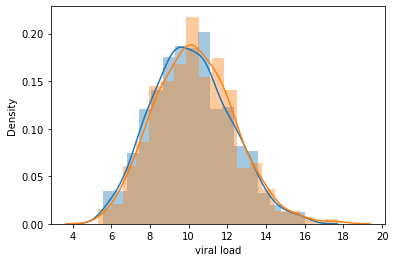

In [27]:
sns.distplot(female)
sns.distplot(male)

((array([-3.08293775e+00, -2.80864001e+00, -2.65494612e+00, -2.54623803e+00,
         -2.46123215e+00, -2.39098897e+00, -2.33087331e+00, -2.27816038e+00,
         -2.23110753e+00, -2.18853038e+00, -2.14958604e+00, -2.11365251e+00,
         -2.08025728e+00, -2.04903264e+00, -2.01968659e+00, -1.99198330e+00,
         -1.96572943e+00, -1.94076443e+00, -1.91695349e+00, -1.89418225e+00,
         -1.87235283e+00, -1.85138079e+00, -1.83119278e+00, -1.81172463e+00,
         -1.79291986e+00, -1.77472852e+00, -1.75710622e+00, -1.74001326e+00,
         -1.72341407e+00, -1.70727658e+00, -1.69157184e+00, -1.67627355e+00,
         -1.66135781e+00, -1.64680278e+00, -1.63258849e+00, -1.61869661e+00,
         -1.60511027e+00, -1.59181391e+00, -1.57879317e+00, -1.56603472e+00,
         -1.55352621e+00, -1.54125615e+00, -1.52921385e+00, -1.51738931e+00,
         -1.50577320e+00, -1.49435679e+00, -1.48313189e+00, -1.47209081e+00,
         -1.46122633e+00, -1.45053164e+00, -1.44000033e+00, -1.42962635e+00,

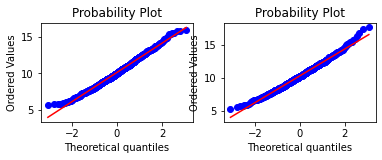

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
stats.probplot(female, dist=stats.norm,plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(male, dist=stats.norm,plot=ax2)

### Hypothesis - 1
#### H0 -  the means of the distributions underlying the samples are equal
#### H1 -  the means of the distributions underlying the samples are unequal

#### Significance level - 0.05

In [29]:
stats.ttest_ind(female,male)

Ttest_indResult(statistic=-1.695711164450323, pvalue=0.0901735841670204)

### Accepting null hypothesis as p value is above significance level and also chart supports the null hypothesis. So, we can say that there is no significant differece in viral load between female and male

### Is the proportion of smoking significantly different across different regions? (Chi-square)

In [30]:
cont_table=pd.crosstab(hospital_data["region"],hospital_data["smoker"])

In [42]:
cont_table["percentage"]=cont_table["yes"]/(cont_table["no"]+cont_table["yes"])
cont_table

smoker,no,yes,percentage
region,,,
northeast,257,67,0.206790
northwest,267,58,0.178462
southeast,273,91,0.250000
southwest,267,58,0.178462


### Hypothesis
#### H0 - there is no relation between the variables
#### H1 - there is significant relationship between variables
#### significance level - 0.1

In [32]:
stat, p, dof, expected = chi2_contingency(cont_table)

In [33]:
p

0.06171954839170541

In [34]:
stat

7.343477761407071

### P value is less than significance level so we are accepting alternative hypothesis. Which means there is significant relation between region and propotion of smoking.

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

In [35]:
slovel0=hospital_data[(hospital_data["sex"]=="female") & (hospital_data["severity level"]==0)]["viral load"]
slovel1=hospital_data[(hospital_data["sex"]=="female") & (hospital_data["severity level"]==1)]["viral load"]
slovel2=hospital_data[(hospital_data["sex"]=="female") & (hospital_data["severity level"]==2)]["viral load"]

((array([-2.52361003, -2.19462034, -2.00515786, -1.8684347 , -1.75971092,
         -1.66852192, -1.58941161, -1.51915762, -1.45569065, -1.39759911,
         -1.34387499, -1.29377212, -1.24672193, -1.20228066, -1.16009498,
         -1.11987867, -1.08139646, -1.04445241, -1.00888152, -0.97454343,
         -0.94131761, -0.9090998 , -0.87779905, -0.84733556, -0.81763884,
         -0.78864629, -0.76030198, -0.73255575, -0.70536236, -0.67868087,
         -0.65247403, -0.62670786, -0.60135122, -0.57637548, -0.55175424,
         -0.52746304, -0.5034792 , -0.47978155, -0.45635035, -0.43316708,
         -0.41021434, -0.38747572, -0.36493573, -0.34257965, -0.32039351,
         -0.29836398, -0.27647832, -0.25472431, -0.2330902 , -0.21156464,
         -0.19013668, -0.16879568, -0.14753129, -0.1263334 , -0.10519214,
         -0.08409779, -0.06304081, -0.04201174, -0.02100124,  0.        ,
          0.02100124,  0.04201174,  0.06304081,  0.08409779,  0.10519214,
          0.1263334 ,  0.14753129,  0.

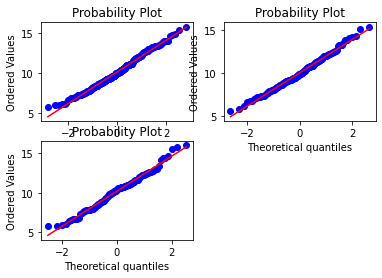

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
stats.probplot(slovel0, dist=stats.norm,plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(slovel1, dist=stats.norm,plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(slovel2, dist=stats.norm,plot=ax3)

C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kunal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='viral load', ylabel='Density'>

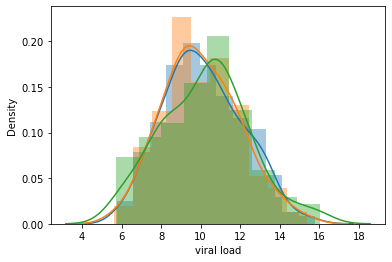

In [37]:
sns.distplot(slovel0)
sns.distplot(slovel1)
sns.distplot(slovel2)

In [38]:
f_oneway(slovel0,slovel1,slovel2)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

### Conclusion
#### Based on ANNOVA test we can say that there is no difference in viral load for women of different severity level